# Cocrystalline Transformation in the Terahertz region

This project is an extension of a project I started in graduate school. There is no cleaning that needs to be done for the data as it is data I personally collected. Transformations from the raw signal were done in MatLab using a script that myself and other group members collaborated to write. 

The data shown here in this Jupyter notebook is the end of processing from a single beam spectra to absorbance in the low frequency IR range below 200 cm-1. This range can be used to view phonon vibrations of the crystalline lattice of solid crystalline materials. 

To start with the data processing, below is the libraries I know my data is stored with wavelength in the first column and the subsequent columns are the absorbances. The labels for the columns are the time data as the data was collected every 10 minutes.

## Getting started: import the libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('THzData2.xlsx')

## Get the data ready to process

My data was collected back in 2018 during graduate school. I personally collected this data along side a visting scholar in my group. This was a large project that several professors at my college worked on. My portion was to collect the spectral data in the THz region and process it. Since I collected the data, I know there are no NaN or missing data in this data set. Cleaning will be more left to chopping off a section of noise in the data which was due to instrumental limitations not due to poor data collection. 

In [3]:
df.head(5)

,cm-1,10,20,30,40,50,60,70,80,90,...,7770,7780,7790,7800,7810,7820,7830,7840,7850,7860
0,9.899316,0.036991,0.042270,0.043157,0.041671,0.040954,0.040835,0.040895,0.040843,0.041168,...,0.041821,0.040862,0.040677,0.040306,0.040825,0.040782,0.040269,0.040264,0.040200,0.040289
1,10.101343,0.036449,0.041683,0.042581,0.041117,0.040406,0.040287,0.040358,0.040305,0.040622,...,0.041270,0.040331,0.040148,0.039774,0.040297,0.040257,0.039749,0.039747,0.039679,0.039775
2,10.303370,0.035860,0.041055,0.041957,0.040522,0.039814,0.039693,0.039773,0.039718,0.040032,...,0.040619,0.039696,0.039518,0.039142,0.039666,0.039633,0.039122,0.039126,0.039052,0.039156
3,10.505397,0.035259,0.040423,0.041324,0.039922,0.039215,0.039091,0.039178,0.039121,0.039435,...,0.039902,0.038989,0.038820,0.038442,0.038965,0.038944,0.038424,0.038434,0.038353,0.038463
4,10.707424,0.034689,0.039827,0.040722,0.039357,0.038649,0.038521,0.038614,0.038553,0.038870,...,0.039148,0.038240,0.038081,0.037703,0.038224,0.038217,0.037683,0.037699,0.037612,0.037726


In [4]:
freq = df['cm-1']

In [5]:
time = df.columns

In [6]:
absorb = df.drop(['cm-1'],axis =1)

Text(0, 0.5, 'Absorbance')

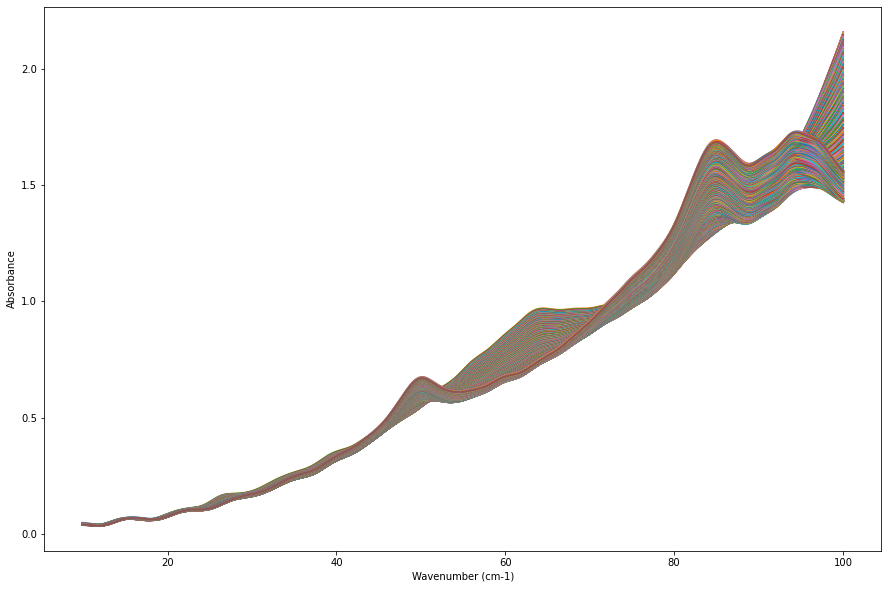

In [7]:
plt.figure(figsize=(15,10))
plt.plot(freq,absorb)
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Absorbance')

That cleaned up the data quite a bit. Now the interesting part about this data is that this is a solid state transformation over the perios of several days. This crystalline solid was in fact a cocrystal but for the sake of explanation we can think of it as any other crystalline compound. A great example of a solid changing with time is chocolate. There are several crystalline forms of chocolate. One is the glossy chocolate we all know very well, where another form of chocolate is powdery. If you open an old candy bar you would have seen that chalky appearance. That is a crystalline transformation that the chocolate made. Both of those crystalline forms move in space differently from one another, because their molecules are packed differently. This affects the physical properties of the chocolate including how it melts, tastes, and feels. Just like chocolate, the compound I was testing in graduate school also went through a transformation like this. The absorbances in this range of light are effected by the packing of the crystals. 

Around 30, 50, 60, 80, and 90 cm-1 there are several peaks that you can see change with time as each spectrum is associated with time. Some of these peaks increase with time while others decrease with time. Previously I found this data difficult to manage as I was havign issues with modeling in a basic sense. Absorbance is defined by Beer's Law which states that absorbance is defined by A=ebc. As this law is addive meaning 

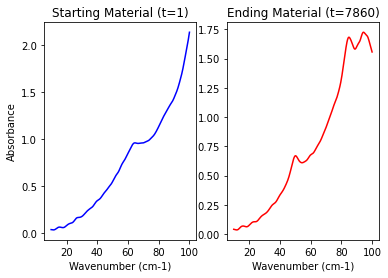

In [8]:
plt.subplot(1, 2, 1)
plt.plot(freq, absorb[10],'blue')
plt.title('Starting Material (t=1)')
plt.ylabel('Absorbance')
plt.xlabel('Wavenumber (cm-1)')


plt.subplot(1, 2, 2)
plt.plot(freq, absorb[time[-1]], 'r')
plt.xlabel('Wavenumber (cm-1)')
plt.title('Ending Material (t='+ str(time[-1]) + ')')
plt.savefig('startend.png')

## Calculating Percent converted

I want to answer the question of what percentage of the material has converted. Since the sample was not made by combining the two forms and testing at different concentrations, I can estimate this using absorbance. Beer's Law states A=ebc, where absorbance is proportional to concentration. First, I need to locate the maximun peaks in the last spectra and the maximum peak in the first spectra. Knowing the peaks associated with the forms allows us to interpret the concentration. The easiest way is through % transformed. This can be determined using the equation below where A is a given absorbance in a spectra at a certain wavelength, by dividing by the high we can a rough percent but due to instrumental fluctuation and sample changes, we can adjust a bit more by subtracting the low at the wavelength from both the numerator and denominator. 

% transformed = (Ai - Alow)/(Ahigh - Alow)*100

In [9]:
spectraFirst = list(absorb.iloc[:,0])

In [10]:
spectraLast = list(absorb.iloc[:,-1])

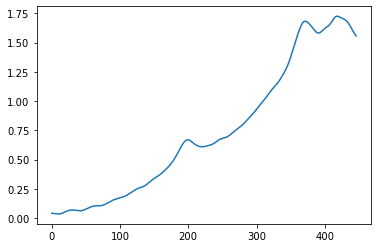

In [11]:
plt.plot(spectraLast)

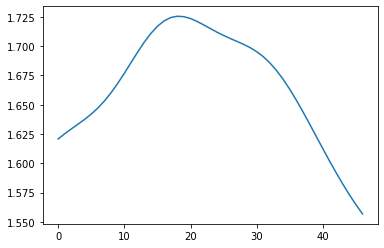

In [12]:
plt.plot(spectraLast[400:450])

In [13]:
highStartPeaks = [spectraFirst[88],max(spectraFirst[200:280])]
StartIndex = [spectraFirst.index(spectraFirst[88]),spectraFirst.index(max(spectraFirst[200:280]))]
lowStartPeaks = [spectraLast[i] for i in StartIndex]

In [14]:
StartIndex

[88, 270]

In [15]:
startPerc1 = []
startPerc2 =[]

for i in range(786):
        startPerc1.append((absorb.iat[StartIndex[0],i] - lowStartPeaks[0])/(highStartPeaks[0]-lowStartPeaks[0]))
for i in range(786):
        startPerc2.append((absorb.iat[StartIndex[1],i] - lowStartPeaks[1])/(highStartPeaks[1]-lowStartPeaks[1]))

startPerc = pd.DataFrame({round(freq[StartIndex[0]],2):startPerc1,round(freq[StartIndex[1]]):startPerc2})

In [16]:
highEndPeaks = [max(spectraLast[150:240]),max(spectraLast[350:400]),max(spectraLast[400:450])]
EndIndex = [spectraLast.index(max(spectraLast[150:240])),spectraLast.index(max(spectraLast[350:400])), spectraLast.index(max(spectraLast[400:450]))]
lowEndPeaks = [spectraFirst[i] for i in EndIndex]

In [17]:
endPerc1 = []
endPerc2 =[]
endPerc3 =[]

for i in range(786):
        endPerc1.append((absorb.iat[EndIndex[0],i] - lowEndPeaks[0])/(highEndPeaks[0]-lowEndPeaks[0]))
for i in range(786):
        endPerc2.append((absorb.iat[EndIndex[1],i] - lowEndPeaks[1])/(highEndPeaks[1]-lowEndPeaks[1]))
for i in range(786):
        endPerc3.append((absorb.iat[EndIndex[2],i] - lowEndPeaks[2])/(highEndPeaks[2]-lowEndPeaks[2]))
endPerc = pd.DataFrame({round(freq[EndIndex[0]],2):endPerc1,round(freq[EndIndex[1]],2):endPerc2,round(freq[EndIndex[2]],2):endPerc3})

In [18]:
EndIndex

[199, 371, 418]

## Evaluating the percent converted
Now that the percents are normalized and calculated. It is important to check that the data is not doing something weird. Since this is real data and there is experimental hiccups that can happen, I wanted to ensure that my work was ok. 

Text(0, 0.5, 'Percent Converted')

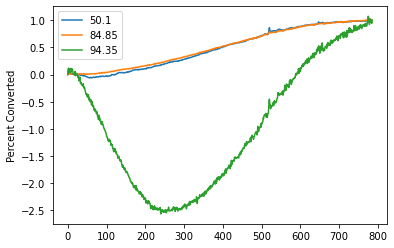

In [19]:
endPerc.plot()
plt.ylabel('Percent Converted')

Looking at this set of data I see that the third set of data at 94.35 cm-1 looks pretty bad. If you refer to the pot where all the data is overlayed you can see that the assumption that I made where lowest was the t=0 was incorrect. I know for a fact that peak does have lower signal to noise and higher variance, so that would be a poor option to use. I will remove that peak

In [20]:
endPerc = endPerc.drop([94.35], axis=1)

In [21]:
wavenumbers = [round(freq[199],2),round(freq[371],2),round(freq[88],2),round(freq[270],2)]

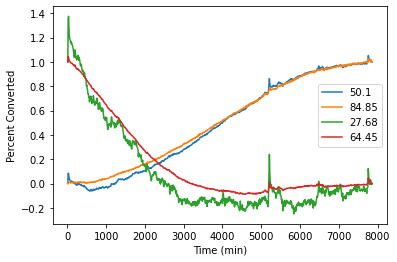

In [22]:
_=plt.plot(time[1:], endPerc)
_=plt.plot(time[1:], startPerc)
plt.xlabel('Time (min)')
plt.ylabel('Percent Converted')
plt.legend(wavenumbers)

These look about as bad as the end plots. I am not surprised that we hover around zero and have values even below. This was a crude way of determining concentration based on what I had. This data is riddled with a sine wave that is caused by inner reflection of light inside the sample. It is difficult to remove. I am also not surprised that we lack "start data" in theory we would have had a constant value around 1 for the starting data. This tells me that the sample was already converting before sample collection began.

You can see sharp spikes in all the perc changes around 500 points. I did not take temperature data but would not be surprised if there was an instrumental change in heat that fluctuated and caused that blip. The peak at 27.68 and the one at 50.1 cm-1 show a higher variablity this is due to their location in the spectra. the lower and higher ends of the spectra typically have lower signal to noise and higher variance.

## Building a model 
I think using some type of averaging of the data points would help to build this model. First I want to try building a model to predict the percent converted to Form II. I chose this because the data at the start is weak. You can clearly see that it began to transform prior to the data collection. I will use the data collected at 84.85 cm-1 to be my percent converted.

### Split the data into X and Y
I will be using the 84.85 cm-1 to generate the percent converted to form II. Then, I will start by using all of the absorbance data and the time as our Y values. 

In [23]:
X = pd.DataFrame(endPerc[84.85].values)

In [24]:
type(X)

pandas.core.frame.DataFrame

In [25]:
X.shape

(786, 1)

In [26]:
Y = absorb.T

In [27]:
Y.head()

,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
10,0.036991,0.036449,0.035860,0.035259,0.034689,0.034193,0.033823,0.033634,0.033684,0.034025,...,1.962607,1.980385,1.998506,2.017055,2.036103,2.055692,2.075843,2.096555,2.117809,2.139586
20,0.042270,0.041683,0.041055,0.040423,0.039827,0.039311,0.038927,0.038729,0.038776,0.039119,...,1.958885,1.978364,1.998700,2.019806,2.041524,2.063641,2.085908,2.108074,2.129917,2.151286
30,0.043157,0.042581,0.041957,0.041324,0.040722,0.040196,0.039800,0.039591,0.039629,0.039968,...,1.973582,1.992675,2.011995,2.031482,2.051075,2.070726,2.090413,2.110157,2.130034,2.150175
40,0.041671,0.041117,0.040522,0.039922,0.039357,0.038870,0.038513,0.038339,0.038406,0.038766,...,1.977681,1.996909,2.016182,2.035537,2.055032,2.074747,2.094777,2.115233,2.136228,2.157873
50,0.040954,0.040406,0.039814,0.039215,0.038649,0.038161,0.037802,0.037628,0.037695,0.038055,...,1.965912,1.983183,2.000966,2.019407,2.038614,2.058649,2.079524,2.101199,2.123589,2.146583


In [28]:
index = [88,270,199,371,418]

In [29]:
freq[index]

88     27.677681
270    64.446570
199    50.102663
371    84.851284
418    94.346547
Name: cm-1, dtype: float64

In [30]:
Yfreq = Y[index]

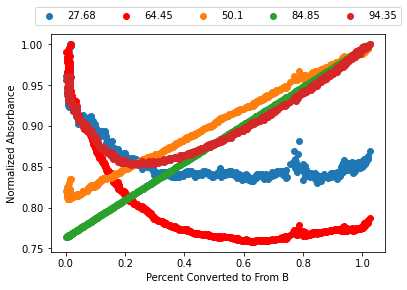

In [31]:
_=plt.scatter(X,Y[88]/max(Y[88]))
_=plt.scatter(X,Y[270]/max(Y[270]),color='red')
_=plt.scatter(X,Y[199]/max(Y[199]))
_=plt.scatter(X,Y[371]/max(Y[371]))
_=plt.scatter(X,Y[418]/max(Y[418]))
plt.ylabel('Normalized Absorbance')
plt.xlabel('Percent Converted to From B')
plt.legend([27.68,64.45,50.10,84.85,94.35],loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=5)
plt.savefig('normalizedAasfuncofFormB.png')

There is are multiple interferences that generate sine waves in the data. This is most likely why the data for several are curved. There is most probably interference with those peaks.

In [32]:
print(index)

[88, 270, 199, 371, 418]


In [33]:
y = Y[199].copy()

In [34]:
y

10      0.553910
20      0.563710
30      0.563265
40      0.560122
50      0.558203
          ...   
7820    0.671222
7830    0.668996
7840    0.668752
7850    0.668756
7860    0.668934
Name: 199, Length: 786, dtype: float64

In [35]:
time

Index(['cm-1',     10,     20,     30,     40,     50,     60,     70,     80,
           90,
       ...
         7770,   7780,   7790,   7800,   7810,   7820,   7830,   7840,   7850,
         7860],
      dtype='object', length=787)

In [36]:
#y['time'] = time[1:]

In [37]:
y.head()

10    0.553910
20    0.563710
30    0.563265
40    0.560122
50    0.558203
Name: 199, dtype: float64

### Generate Test and Train Data. 
Here I held back 20% of the data to test with.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
X_train.shape

(628, 1)

In [40]:
y_train.shape

(628,)

### The first stab at building a model...

I am planning to use a PLS model to build my regression. To determine the number of components I am going to first do PCA. I chose to use the one other peak that was mostly linear (50.1) to build this model as it will be most representative of the data. 

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
len(y_train)

628

Text(0, 0.5, 'Absorbance')

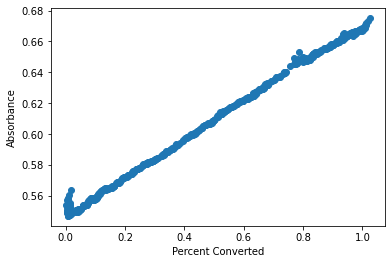

In [44]:
plt.scatter(X_train,y_train)
plt.xlabel('Percent Converted')
plt.ylabel('Absorbance')

In [45]:
LR = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)

In [46]:
LR.fit(X_train,y_train)

LinearRegression()

In [47]:
m = LR.coef_

In [48]:
b = LR.intercept_

I expected the plotted data to be straight as I used this data to determine the concentration. 

In [49]:
xs = [0,1]

In [50]:
ys=m*xs+b

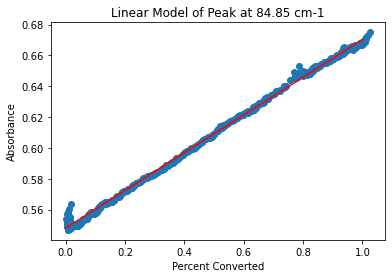

<Figure size 432x288 with 0 Axes>

In [51]:
_=plt.scatter(X_train,y_train)
_=plt.plot(xs,ys, color = 'red')
plt.ylabel('Absorbance')
plt.xlabel('Percent Converted')
plt.title('Linear Model of Peak at 84.85 cm-1')
plt.show()
plt.savefig('linearmodel.png')

In [52]:
y_pred = LR.predict(X_test)

In [53]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
7540,0.667277,0.668888
400,0.551649,0.549257
2120,0.568304,0.569237
2000,0.565914,0.567380
2360,0.572961,0.574043
...,...,...
800,0.548551,0.550912
1490,0.558368,0.560233
3370,0.595452,0.596907
4940,0.634273,0.632864


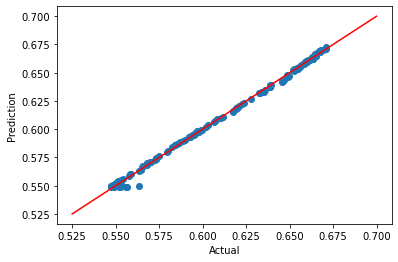

In [54]:
plt.scatter(y_test,y_pred)
plt.plot([0.525,0.7],[0.525,.7],color='red')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.savefig('ActualVsPrediction.png')

As you can see the data was modeled well using this method. The data points it struggled to predict are in the range that we see is non-linear towards the bottom of the normalized absorbance plot. This could be due to the sine waves or to sampling issues. 

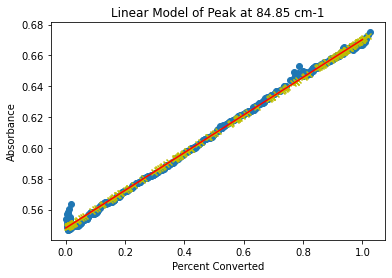

In [58]:
_=plt.scatter(X_train,y_train)
_=plt.plot(xs,ys, color = 'red')
_=plt.scatter(X_test, y_pred, color = 'y', marker = 'x')
plt.ylabel('Absorbance')
plt.xlabel('Percent Converted')
plt.title('Linear Model of Peak at 84.85 cm-1')
plt.savefig('ActualandPredicted.png')
plt.show()

In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percent Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 0.0013480936167417135
Mean Squared Error: 4.009023149318015e-06
Root Mean Squared Error: 0.0020022545166182085
Mean Absolute Percent Error: 0.002269403582822871


The root mean square error is very low, which means the model does a good job of predicting the percentage converted. 

In [ ]:
from sys import stdout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from sklearn.preprocessing import scale 

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''

    mse = []
    component = np.arange(1, n_comp)

    for i in component:
        pls = PLSRegression(n_components=i)

        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)

        mse.append(mean_squared_error(y, y_cv))

        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")

    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)

        plt.show()

    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)

    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)

    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')

        plt.show()

    return

In [ ]:
X2 = savgol_filter(y_train, 17, polyorder = 2,deriv=2)

In [ ]:
# Plot second derivative
plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(freq, X2.T)
    plt.xlabel('Wavenumber')
    plt.ylabel('Second Derivative of Absorbance')
    plt.show()

In [ ]:
optimise_pls_cv(X_train,X2, 40, plot_components=True)